In [175]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [176]:
def Round(n, decimals = 0):    #customized round function.
    multiplier = 10 ** decimals
    if n>=0:
        m=int(n*multiplier + 0.5) / multiplier
    else:
        m=int(n*multiplier - 0.5) / multiplier
    return m

# Functions for root finding

In [177]:
def CheckInit(f, a, b, tol): #checking where does the root lies w.r.t the brackets.
    f_a = f(a)
    f_b = f(b)
    
    if f_a*f_b >= 0.0:
        return 0
    
    if (abs(f_a)< tol):
        return 1
    
    if (abs(f_b)< tol):
        return 2
    
    return 3

## Bisection method

In [178]:
def Bisection(f, a_0, b_0, beta=2, tol=10**(-5)):   
    a = a_0
    b = b_0
    a_i = 0.0
    
    f_a = f(a)
    f_b = f(b)
    f_ai = 0.0
    x_B=[]
    y_B=[]
    z_B=[]
    imax = 10000  #max number of times for finding the root
    i = 0
    
    flag = CheckInit(f, a_0, b_0, tol)
    
    if (flag == 0):               #bracketing algoritm, i.e. moving of the bracket 
        if abs(f(a))<abs(f(b)):
            a=a-beta*(b-a)       #default value of beta=2
        else:
            b=b+beta*(b-a)  
    
    if (flag ==1):
        return a                 #if root lies at the bracketing vales
    
    if (flag ==2):
        return b
    
    flag = 1
    
    while (flag):   #while flag value is still 1, we will run this loop
        a_i = .5 * (a +b)     #new guess
        f_ai = f(a_i)
        
        if (abs(f_ai)<tol) or (b-a)/2<tol:  #stopping loop exceeding tolerance
            flag = 0
        else:
            if (f(a)*f(a_i)>0):        #moving bracket to converge
                a = a_i
            else:
                b = a_i
        
        
        z_B.append(a_i)
        y_B.append(f(a_i))
        i += 1
        x_B.append(i)
        if (i >= imax):                #stop interating when the limit is reached
            raise StopIteration('stopped iterating')
        
    return(a_i,x_B,y_B,z_B)

## Regula Falsi Method

In [179]:
def RegulaFalsi(f, a_0, b_0, beta=0.05, tol=10**(-5)):
    a = a_0
    b = b_0
    a_i = 0.0
    
    f_a = f(a)
    f_b = f(b)
    f_ai = 0.0
    x_rf=[]
    y_rf=[]
    z_rf=[]
    imax = 10000  #max number of times for finding the root
    i = 0
    
    flag = CheckInit(f, a_0, b_0, tol)
    
    if (flag == 0):                     #bracketing algoritm, i.e. moving of the bracket
        if abs(f(a))<abs(f(b)):
            a=a-beta*(b-a)
        else:
            b=b+beta*(b-a)  
    
    if (flag ==1):                  #checking if root is at bracket
        return a
    
    if (flag ==2):
        return b
    
    flag = 1
    
    while (flag):   #while flag value is still 1, we will run this loop
        a_i = b-((b-a)*f(b)/(f(b)-f(a)))
        f_ai = f(a_i)
        
        if (abs(f_ai)<tol):
            flag = 0
        else:
            if (f(a)*f(a_i)>0):       #converging step
                a = a_i
            else:
                b = a_i
        
        
        z_rf.append(a_i)
        y_rf.append(f(a_i))
        i += 1
        x_rf.append(i)
    
        if (i >= imax):
            raise StopIteration('stopped iterating')
        
    return(a_i,x_rf,z_rf,y_rf)

## Newton-Raphson Method

In [180]:
def df(f,x,dx=.001):             #function for derivation
    return((f(x+dx)-f(x))/dx)

def NR(f,x,dx=0.001,tol=10**(-5)): #newton raphson method
    x_N=[]
    y_N=[]
    while abs(-f(x)/df(f,x,dx))>tol or f(x-f(x)/df(f,x,dx))>tol:  #tolerance check
        x=x-f(x)/df(f,x,dx)
        x_N.append(x)
        y_N.append(f(x))
    return(x,x_N,y_N)

## Secant Method

In [181]:
def secant_method(func, x0, x1, epsilon=0.0001, max_iter=1000):
    x_prev = x0
    x_curr = x1

    for _ in range(max_iter):
        f_prev = func(x_prev)
        f_curr = func(x_curr)

        if abs(f_curr) < epsilon:
            return x_curr

        x_next = x_curr - f_curr * (x_curr - x_prev) / (f_curr - f_prev)

        if abs(x_next - x_curr) < epsilon:
            return x_next

        x_prev = x_curr
        x_curr = x_next

    raise ValueError("Secant method did not converge within the maximum number of iterations.")

## Fixed point method

In [182]:
def fixed_point(funct,x1,tol,iter=1000):
    xi=x1
    xj=funct(x1)
    i=0
    while np.abs(xj-xi)>=tol:
        xi=xj
        xj=funct(xi)
        i+=1
        if i==iter:
            print("!!Convergence not achieved!! Please change the function!!")
            break
    return(xi)

# Numerical Integral

In [183]:
def INT_MID(func,a,b,N=100000):
    h=(b-a)/N
    x_a=a
    x_b=a+h
    r=0
    for i in range(N):
        x=(x_a+x_b)/2
        r+=(h*func(x))
        x_a=x_a+h
        x_b=x_b+h
    return(r)

In [184]:
def INT_TRAP(func,a,b,N=100000):
    h=(b-a)/N
    x_a=a
    x_b=a+h
    r=0
    for i in range(N):
        f_a=func(x_a)
        f_b=func(x_b)
        r+=h*(f_a+f_b)/2
        x_a=x_a+h
        x_b=x_b+h
    return(r)

In [185]:
def INT_SIMP(func,a,b,N=100000):
    h=(b-a)/N
    x_a=a
    x_b=a+2*h
    r=0
    for i in range(int(N/2)):
        x_c=(x_a+x_b)/2
        f_a=func(x_a)
        f_b=func(x_b)
        f_c=func(x_c)
        r+=h*(f_a+4*f_c+f_b)/3
        x_a=x_a+2*h
        x_b=x_b+2*h
    return(r)

# ODE Solver

## Non-Symplectic

In [186]:
def Forward_Euler(f,y_0,x_0,h,X_N=10):
    N=int(X_N/h)
    X=[x_0]
    Y=[y_0]
    x_n=x_0
    y_n=y_0
    for i in range(N):
        y_n1=y_n+h*f(y_n,x_n)
        X.append(x_n+h)
        Y.append(y_n1)
        y_n=y_n1
        x_n=x_n+h
    return(X,Y)

In [187]:
def Backward_Euler(f,y_0,x_0,h,X_N=10):
    N=int(X_N/h)
    X=[x_0]
    Y=[y_0]
    x_n=x_0
    y_n=y_0
    for i in range(N):
        def func(y_n1):
            return(y_n+h*f(y_n1,x_n+h)-y_n1)
        y_nR,XNR,YNR=NR(func,x_n,dx=0.001,tol=10**(-5))
        y_n1=y_n+h*f(y_nR,x_n+h)
        X.append(x_n+h)
        Y.append(y_n1)
        y_n=y_n1
        x_n=x_n+h
    return(X,Y)

In [188]:
def Predictor_Corrector(f,y_0,x_0,h,X_N=10):
    N=int(X_N/h)
    X=[x_0]
    Y=[y_0]
    x_n=x_0
    y_n=y_0
    for i in range(N):
        K1=h*f(y_n,x_n)
        yP_n1=y_n+K1
        K2=h*f(yP_n1,x_n+h)
        yC_n1=y_n+(K1+K2)/2
        X.append(x_n+h)
        Y.append(yC_n1)
        y_n=yC_n1
        x_n=x_n+h
    return(X,Y)

In [189]:
def RK2(f,y_0,x_0,h,X_N=10):
    N=int(X_N/h)
    X=[x_0]
    Y=[y_0]
    x_n=x_0
    y_n=y_0
    for i in range(N):
        k1=h*f(y_n,x_n)
        k2=h*f(y_n+k1/2,x_n+h/2)
        y_n1=y_n+k2
        X.append(x_n+h)
        Y.append(y_n1)
        y_n=y_n1
        x_n=x_n+h
    return(X,Y)

In [190]:
def RK4(f,y_0,x_0,h,X_N=10):
    N=int(X_N/h)
    X=[x_0]
    Y=[y_0]
    x_n=x_0
    y_n=y_0
    for i in range(N):
        k1=h*f(y_n,x_n)
        k2=h*f(y_n+k1/2,x_n+h/2)
        k3=h*f(y_n+k2/2,x_n+h/2)
        k4=h*f(y_n+k3,x_n+h)
        y_n1=y_n+(k1+2*k2+2*k3+k4)/6
        X.append(x_n+h)
        Y.append(y_n1)
        y_n=y_n1
        x_n=x_n+h
    return(X,Y)

In [191]:
def RK42nd(F1,y0,u0,x0,a,b,h):
    #N=int((b-a)/(2*h))
    #l=isinstance(N,int)
    if a<x0 and b>x0:
        i=2
        N1=int((x0-a)/(h))
        N2=int((b-x0)/(h))
        xpoints1 = [(x0-h*i) for i in range(N1+1)]
        xpoints2 = [(x0+h*i) for i in range(N2+1)]
        xpoints= xpoints1+xpoints2
    elif x0<=a:
        i=1
        N1=int((b-x0)/(2*h))
        xpoints=[(x0+h*i) for i in range(2*N1+1)]
    elif x0>=b:
        i=2
        N2=int((x0-a)/(2*h))
        xpoints = [(x0-h*i) for i in range(2*(N2+1))]
    ypoints = []
    upoints = []
    #print(l)
    #print(xpoints)
    for x in xpoints:
        if x==x0:
            y=y0
            u=u0
            i-=1
        ypoints.append(y)
        upoints.append(u)
        if i==1:
            s=-1
        elif i==0:
            s=1

        m1 = h*u
        k1 = h*F1(y, u, x)  #(x, v, t)

        m2 = h*(u +s* 0.5*k1)
        k2 = h*F1(y+s*0.5*m1, u+s*0.5*k1, x+s*0.5*h)

        m3 = h*(u +s* 0.5*k2)
        k3 = h*F1(y+s*0.5*m2, u+s*0.5*k2, x+s*0.5*h)

        m4 = h*(u +s* k3)
        k4 = h*F1(y+s*m3, u+s*k3, x+s*h)

        y =y+s* (m1 + 2*m2 + 2*m3 + m4)/6
        u =u+s* (k1 + 2*k2 + 2*k3 + k4)/6
    if a<x0 and b>x0:
        xpointsN=xpoints[0:N1+1]
        ypointsN=ypoints[0:N1+1]
        xpointsN.reverse()
        ypointsN.reverse()
        for i in range(N1+1):
            xpoints[i]=xpointsN[i]
            ypoints[i]=ypointsN[i]
    elif x0>=b:
        xpoints.reverse()
        ypoints.reverse()
    return(xpoints,ypoints)

In [192]:
def RK43CE(F1,F2,F3,y0,u0,z0,x0,a,b,h):
    #l=isinstance(N,int)
    if a<x0 and b>x0:
        i=2
        N1=int((x0-a)/(h))
        N2=int((b-x0)/(h))
        xpoints1 = [(x0-h*i) for i in range(N1+1)]
        xpoints2 = [(x0+h*i) for i in range(N2+1)]
        xpoints= xpoints1+xpoints2
    elif x0<=a:
        i=1
        N1=int((b-x0)/(2*h))
        xpoints=[(x0+h*i) for i in range(2*N1+1)]
    elif x0>=b:
        i=2
        N2=int((x0-a)/(2*h))
        xpoints = [(x0-h*i) for i in range(2*(N2+1))]
    ypoints = []
    upoints = []
    zpoints = []
    #print(l)
    #print(xpoints)
    for x in xpoints:
        if x==x0:
            y=y0
            u=u0
            z=z0
            i-=1
        ypoints.append(y)
        upoints.append(u)
        zpoints.append(z)
        if i==1:
            s=-1
        elif i==0:
            s=1

        m1 = h*F1(y,u,z,x)
        k1 = h*F2(y,u,z,x)  #(x, v, t)
        l1 = h*F3(y,u,z,x)
        

        m2 = h*F1(y+s*0.5*m1, u+s*0.5*k1,z+s*0.5*l1, x+s*0.5*h)
        k2 = h*F2(y+s*0.5*m1, u+s*0.5*k1,z+s*0.5*l1, x+s*0.5*h)
        l2 = h*F3(y+s*0.5*m1, u+s*0.5*k1,z+s*0.5*l1, x+s*0.5*h)

        m3 = h*F1(y+s*0.5*m2, u+s*0.5*k2,z+s*0.5*l2, x+s*0.5*h)
        k3 = h*F2(y+s*0.5*m2, u+s*0.5*k2,z+s*0.5*l2, x+s*0.5*h)
        l3 = h*F3(y+s*0.5*m2, u+s*0.5*k2,z+s*0.5*l2, x+s*0.5*h)

        m4 = h*F1(y+s*m3, u+s*k3,z+s*l3,x+s*h)
        k4 = h*F2(y+s*m3, u+s*k3,z+s*l3,x+s*h)
        l4 = h*F3(y+s*m3, u+s*k3,z+s*l3,x+s*h)

        y =y+s* (m1 + 2*m2 + 2*m3 + m4)/6
        u =u+s* (k1 + 2*k2 + 2*k3 + k4)/6
        z =z+s* (l1 + 2*l2 + 2*l3 + l4)/6
    if a<x0 and b>x0:
        xpointsN=xpoints[0:N1+1]
        ypointsN=ypoints[0:N1+1]
        zpointsN=zpoints[0:N1+1]
        upointsN=upoints[0:N1+1]
        xpointsN.reverse()
        ypointsN.reverse()
        zpointsN.reverse()
        upointsN.reverse()
        for i in range(N1+1):
            xpoints[i]=xpointsN[i]
            ypoints[i]=ypointsN[i]
            zpoints[i]=zpointsN[i]
            upoints[i]=upointsN[i]
    elif x0>=b:
        xpoints.reverse()
        ypoints.reverse()
        zpoints.reverse()
        upoints.reverse()
    return(xpoints,upoints,ypoints,zpoints)

In [193]:
def Shooting_RK4(f,y1,x1,y2,x2,a,b,h,tol,c1=-4,c2=5):
    D=1
    i=0
    while D>tol:
        i+=1
        X1,Y1=RK42nd(f,y1,c1,x1,a,b,h)
        X2,Y2=RK42nd(f,y1,c2,x1,a,b,h)
        i=X1.index(x2)
        c3=c1+(c2-c1)*(y2-Y1[i])/(Y2[i]-Y1[i])
        X3,Y3=RK42nd(f,y1,c3,x1,a,b,h)
        if y2<Y3[i]:
            c1=c3
        else:
            c2=c3
        D=abs(Y3[i]-y2)
    #print(i)
    return(X3,Y3)

## Finite Element Method

In [194]:
def finite_element_method(funct,a,b,alpha,beta,n):
    h=(b-a)/n
    X=np.linspace(a,b,num=n+1)
    XR=X[1:-1]
    Mat=np.diag(np.full(n-1,2))+np.diag(np.full(n-2,-1),1)+np.diag(np.full(n-2,-1),-1)
    #print(Mat)
    #print(func(X))*h**2
    F=np.array([-1*funct(XR)*h**2])
    #print(F)
    F[0][0]=F[0][0]+alpha
    F[0][-1]=F[0][-1]+beta
    #print(F[0][-1])
    #print(F)
    F=Transpose(F)
    #print(F)
    #print(InverseMatrix(Mat.tolist(),6))
    Y=MATMULT(InverseMatrix(Mat.tolist(),6),F)
    Y=Transpose(Y)[0]
    #print(Y)
    XR=[a]+XR.tolist()+[b]
    Y=[alpha]+Y+[beta]
    return(XR,Y)

## Symplectic Integrals

In [195]:
def semi_implicit_Euler(funct1,funct2,x0,y0,dt,n,t0=0):
    X=[]
    Y=[]
    x=x0
    y=y0
    T=np.arange(t0,t0+n*dt,dt)
    for i in range(n):
        X.append(x)
        Y.append(y)
        y+=funct2(t0+i*dt,x)*dt
        x+=funct1(t0+i*dt,y)*dt
    return(T,X,Y)

In [196]:
def verlet(A,x0,v0,dt,n,t0=0):
    X=[x0]
    T=np.linspace(t0,t0+dt*n,num=n)
    X.append(x0+v0*dt+0.5*A(x0)*dt**2)
    for i in range(n-2):
        X.append(2*X[-1]-X[-2]+A(X[-1])*dt**2)
    return(T,X)

In [197]:
def velocity_verlet(A,x0,v0,dt,n,t0=0): #A is a function, x0,v0 are initial values, dt is time step, n is number of step.
    X=[x0]
    V=[v0]
    for i in range(n):
        V.append(V[-1]+0.5*A(X[-1])*dt)
        X.append(X[-1]+V[-1]*dt)
        V.append(V[-2]+0.5*dt*(A(X[-1])+A(X[-2])))
    return(X,V)



In [198]:
def leapfrog(F,x0,p0,dt,tau,t0=0):
    X=[x0]
    P=[p0]
    n=int((tau-t0)/dt)
    Tx=np.linspace(t0,tau,num=n)
    Tp=Tx+0.5*dt
    P.append(P[-1]+0.5*F(t0)*dt)
    for i in range(1,n-1):
        X.append(X[-1]+P[-1]*dt)
        P.append(P[-1]+F(t0+i*dt)*dt)
    X.append(X[-1]+P[-1]*dt)
    pf=P[-1]+F(tau-0.5*dt)*0.5*dt
    return(Tx,Tp,X,P,pf)

# PDE solver

## Explicit

In [199]:
def Explicit(funct,a,b,alpha,nx,nt,at=0):
    X=np.linspace(a,b,num=nx)
    dt=alpha*((b-a)/nx)**2
    T=nt*dt
    Y=np.arange(at,T,dt)
    U_0=funct(X)
    #print(U_0)
    Z=[]
    U_0=Transpose([U_0])
    #print(U_0)
    B=np.diag(np.full(nx,1-2*alpha))+np.diag(np.full(nx-1,alpha),1)+np.diag(np.full(nx-1,alpha),-1)
    for i in range(nt):
        U_0=MATMULT(B.tolist(),U_0)
        Z.append(np.array(U_0).flatten())
    #U_0=Transpose(U_0)[0]
    #print(U_0)
    Z=np.array(Z)
    print(Z.shape)
    (X,Y)=np.meshgrid(X,Y)
    return(X,Y,Z)


In [200]:
def contourplot(X,Y,Z):
    fig1, ax2 = plt.subplots(layout='constrained')
    CS = ax2.contourf(X, Y, Z, 100, cmap=plt.cm.bone)

    CS2 = ax2.contour(CS, levels=CS.levels[::10], colors='r')

    ax2.set_title('Solution of heat equation')
    ax2.set_xlabel('x-axis')
    ax2.set_ylabel('t-axis')

    # Make a colorbar for the ContourSet returned by the contourf call.
    cbar = fig1.colorbar(CS)
    cbar.ax.set_ylabel('Heat')
    # Add the contour line levels to the colorbar
    #cbar.add_lines(CS2)

## Implicit

In [201]:
def Implicit(funct,a,b,alpha,nx,nt,at=0):
    X=np.linspace(a,b,num=nx)
    dt=alpha*((b-a)/nx)**2
    T=nt*dt
    Y=np.arange(at,T,dt)
    U_0=funct(X)
    #print(U_0)
    Z=[]
    U_0=Transpose([U_0])
    #print(U_0)
    B=np.diag(np.full(nx,1+2*alpha))-np.diag(np.full(nx-1,alpha),1)-np.diag(np.full(nx-1,alpha),-1)
    C=Cholinv(B.tolist())
    for i in range(nt):
        U_0=MATMULT(C,U_0)
        Z.append(np.array(U_0).flatten())
    #U_0=Transpose(U_0)[0]
    #print(U_0)
    Z=np.flip(np.array(Z))
    #print(Z.shape)
    (X,Y)=np.meshgrid(X,Y)
    return(X,Y,Z)


## Crank Nicholson

In [202]:
def crank_nicholson(funct,a,b,alpha,nx,nt):
    x=np.linspace(a,b,num=nx)
    U_0=funct(x)
    B=np.diag(np.full(nx,2))-np.diag(np.ones(nx-1),1)-np.diag(np.ones(nx-1),-1)
    I=np.diag(np.full(nx,1))
    M=np.matmul(np.linalg.inv(2*I+alpha*B),(2*I-alpha*B))
    S=np.linalg.matrix_power(M, nt)
    return(np.matmul(S,U_0),x)

In [203]:
def cn_data(funct,a,b,alpha,nx,at,pt):
    X=np.linspace(a,b,num=nx)
    dt=alpha*((b-a)/nx)**2
    T=pt*dt
    Y=np.arange(at,T,dt)
    (X,Y)=np.meshgrid(X,Y)
    Z=[]
    for j in np.arange(0,pt):
        z,x=crank_nicholson(funct,a,b,alpha,nx,j)
        Z.append(z)
    return(X,Y,Z)

In [204]:
def crank_nicholsonn(funct,a,b,alpha,nx,nt):
    x=np.linspace(a,b,num=nx)
    U_0=funct(x)
    U_0=Transpose([U_0])
    B=np.diag(np.full(nx,2))-np.diag(np.ones(nx-1),1)-np.diag(np.ones(nx-1),-1)
    I=np.diag(np.full(nx,1))
    M=MATMULT(Cholinv(2*I+alpha*B),(2*I-alpha*B))         #currently we use the readily available matrix inversion algorithm from numpy
    S=np.linalg.matrix_power(M, nt)
    return(Transpose(MATMULT(S,U_0))[0],x)
def cn_data_new(funct,a,b,alpha,nx,at,pt):
    X=np.linspace(a,b,num=nx)
    dt=(alpha/4)*((b-a)/nx)**2                                    #4 comes from the differential equation
    T=pt*dt
    Y=np.arange(at,T,dt)
    (X,Y)=np.meshgrid(X,Y)
    Z=[]
    for j in np.arange(pt,0,-1):
        z,x=crank_nicholsonn(funct,a,b,alpha,nx,j)
        Z.append(z)
    return(X,Y,Z)

## Poisson Equation solver

In [205]:
def poisonsolver(xa,xb,ya,yb,n,k=1,plot=True):
    x0=np.linspace(xa,xb,num=n)
    y0=np.linspace(ya,yb,num=n)
    h=(yb-ya)/(n-1)
    W=np.zeros((n,n))
    alpha=k*((xb-xa)/(yb-ya))**2
    W[0]=funcbottom(x0)
    W[n-1]=functop(x0)
    for i in range(n):
        W[i][0]=funcleft(y0[i])
        W[i][n-1]=funcright(y0[i])
    n2=n-2
    R=np.zeros((n2,n2))
    for i in range(n2):
        for j in range(n2):
            R[i][j]=-alpha*funcrho(x0[i+1],y0[j+1])*h**2
    R=np.transpose(R)
    N2=n2**2
    B=np.zeros((n2,n2))
    B[0]=W[0][1:-1]
    B[n2-1]=W[n-1][1:-1]
    for i in range(n2):
        B[i][0]+=alpha*W[i+1][0]
        B[i][n2-1]+=alpha*W[i+1][n-1]
    A=np.diag(np.full(N2,2+2*alpha))-alpha*np.diag(np.ones(N2-1),1)-alpha*np.diag(np.ones(N2-1),-1)-np.diag(np.ones(N2-n2),n2)-np.diag(np.ones(N2-n2),-n2)
    for i in range(1,n2):
        A[n2*i-1][n2*i]=0
        A[n2*i][n2*i-1]=0
    Ainv=np.array(Cholinv(A,6))
    rho=B-R
    u=np.dot(Ainv,rho.flatten())
    matrix = u.reshape((n2,n2))
    for i in range(n2):
        for j in range(n2):
            W[i+1][j+1]=matrix[i][j]
    if plot==True:
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        X,Y=np.meshgrid(x0,y0)
        surf = ax.plot_surface(X, Y, W, cmap=plt.cm.viridis,
                       linewidth=0, antialiased=True)
        ax.set_ylabel('y')
        ax.set_xlabel('x')
        plt.show()
    return(W)

In [206]:
def functop(x):
    return(0)
def funcbottom(x):
    return(0)
def funcleft(y):
    return(1)
def funcright(y):
    return(1)

In [207]:
def funcrho(x,y):
    return(0)

In [208]:
def wavesolver(xa,xb,ya,yb,n,k=1,plot=True):
    x0=np.linspace(xa,xb,num=n)
    y0=np.linspace(ya,yb,num=n)
    h=(yb-ya)/(n-1)
    W=np.zeros((n,n))
    alpha=k*((xb-xa)/(yb-ya))**2
    W[0]=funcbottom(x0)
    W[n-1]=functop(x0)
    for i in range(n):
        W[i][0]=funcleft(y0[i])
        W[i][n-1]=funcright(y0[i])
    n2=n-2
    R=np.zeros((n2,n2))
    for i in range(n2):
        for j in range(n2):
            R[i][j]=-alpha*funcrho(x0[i+1],y0[j+1])*h**2
    R=np.transpose(R)
    N2=n2**2
    B=np.zeros((n2,n2))
    B[0]=W[0][1:-1]
    B[n2-1]=W[n-1][1:-1]
    for i in range(n2):
        B[i][0]+=alpha*W[i+1][0]
        B[i][n2-1]+=alpha*W[i+1][n-1]
    A=np.diag(np.full(N2,2+2*alpha))-alpha*np.diag(np.ones(N2-1),1)-alpha*np.diag(np.ones(N2-1),-1)-np.diag(np.ones(N2-n2),n2)-np.diag(np.ones(N2-n2),-n2)
    for i in range(1,n2):
        A[n2*i-1][n2*i]=0
        A[n2*i][n2*i-1]=0
    Ainv=np.array(InverseMatrix(A.tolist(),6))
    rho=B-R
    u=np.dot(Ainv,rho.flatten())
    matrix = u.reshape((n2,n2))
    for i in range(n2):
        for j in range(n2):
            W[i+1][j+1]=matrix[i][j]
    if plot==True:
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        X,Y=np.meshgrid(x0,y0)
        surf = ax.plot_surface(X, Y, W, cmap=plt.cm.viridis,
                       linewidth=0, antialiased=True)
        ax.set_ylabel('y')
        ax.set_xlabel('x')
        plt.show()
    return(W)

# Plotting

In [209]:
def contourplot(x,y,z):
    fig1, ax2 = plt.subplots(layout='constrained')
    CS = ax2.contourf(x, y, z, 100, cmap=plt.cm.bone)

    CS2 = ax2.contour(CS, levels=CS.levels[::10], colors='r')

    ax2.set_title('Solution of heat equation')
    ax2.set_xlabel('x-axis')
    ax2.set_ylabel('t-axis')

    # Make a colorbar for the ContourSet returned by the contourf call.
    cbar = fig1.colorbar(CS)
    cbar.ax.set_ylabel('Heat')
    # Add the contour line levels to the colorbar
    cbar.add_lines(CS2)

# Matrix Algebra

## Non iterative methods

In [210]:
def MATMULT(a,b):                     #function for matrix multiplication 
    M=[]
    if len(b)==len(a[0]):              #check if the input matrices are matrix multiplicable or not.
        for m in range(len(a)):
            M.append([])
            for n in range(len(b[0])):
                M[m].append(0)
        for i in range(len(a)):
            for j in range(len(b[0])):
                for k in range(len(b)):
                    M[i][j] += a[i][k] * b[k][j]
        return(M)
    else:
        print("Inputs are dimentionally incorrect.")
        return

In [211]:
def SwapRows(a,n,m):          #function for swapping rows
    a[n],a[m]=a[m],a[n]
    return a
#SwapRows(B,1,2)

In [212]:
def RoundMatrix(M,r):
    for i in range(len(M)):
        for j in range(len(M[0])):
            M[i][j]=Round(M[i][j],r)
    return M

In [213]:
def PartialPivot(Ab,m,nrows):
    pivot = Ab[m][m]    #finding The pivot
    if (Ab[m][m] != 0):
        return Ab    # return if partial pivoting is not required
    else:
        x=[]
        for r in range(m+1,nrows):
            x.append(Ab[r][m])
        for r in range(m+1,nrows):
            # check for maximum non-zero pivot and swap rows with it
            if Ab[r][m]==max(x):
                pivot = Ab[r][m]
                Ab=SwapRows(Ab,m,r)
                return(Ab)
            else:
                r+=1
    if (pivot==0):    # no unique solution case
        return None


In [214]:
def GaussJordan(Ab,nrows,ncols):
    det=1
    r=0
    for r in range(0,nrows):
        Ab = PartialPivot(Ab,r,nrows) # does partial pivoting
        
        if Ab==None:
            return Ab                # no solution case
        else:
            fact=Ab[r][r]             #store and multiply diagonal elements
            det=det*fact           # calculate the determinant
            for c in range(r,ncols):
                Ab[r][c]*=1/fact# Changes the diagonal elements to unity, and do same operation in row
            for r1 in range(0,nrows):
                if (r1==r or Ab[r1][r]==0):
                    r1+=1                # does not change if it is already done
                else:
                    factor = Ab[r1][r]
                    for c in range(r,ncols):
                        Ab[r1][c]-= factor * Ab[r][c]# Changes the off-diagonal elements to zero
    return Ab, det
def RoundMatrix(M,r):
    for i in range(len(M)):
        for j in range(len(M[0])):
            M[i][j]=Round(M[i][j],r)
    return M


In [215]:
def EqnSolver(A,B,nrows,r=2):
    ncols=len(A[0])+len(B[0])
    Ab=copy.deepcopy(A)
    for i in range(len(Ab)):
        for j in range(len(B[0])):
            Ab[i].append(B[i][j])   #function for solving equations
    GJ, d=GaussJordan(Ab,nrows,ncols)    #doing Gauss-Jordan elimination
    if GJ!=None:
        M=RoundMatrix(GJ,r)
        print("Solutions are : ")
        for i in range(nrows):
            print(M[i][nrows])      #printing solution
    else:
        print("No unique solution")  #printing if no unique solution

#A2=[[0,2,-3],[1,0,1],[1,-1,0]]
#B2=[[-1],[0],[3]]
#EqnSolver(A2,B2,3)

In [216]:
def GaussJordan_solver(A,B,r=2):
    nrows=len(A[0])
    ncols=len(A[0])+len(B[0])
    Ab=copy.deepcopy(A)
    sol=[]
    for i in range(len(Ab)):
        for j in range(len(B[0])):
            Ab[i].append(B[i][j])   #function for solving equations
    GJ, d=GaussJordan(Ab,nrows,ncols)    #doing Gauss-Jordan elimination
    if GJ!=None:
        M=RoundMatrix(GJ,r)
        #print("Solutions are : ")
        for i in range(nrows):
            #print(M[i][nrows])      #printing solution
            sol.append([M[i][nrows]])
    else:
        print("No unique solution") 
    return(sol)

In [217]:
def InverseMatrix(P,l=2):             #function for inverse
    A = copy.deepcopy(P)            #copying P in A without equality
    for i in range(len(A)):
        for j in range(len(A)):
            A[i].append(0)
        A[i][i+len(A)]=1            #building augmented matrix
    r=len(A)
    c=len(A[0])
    if len(P)!=len(P[0]):            #checking if the input matrix is square.
        return("This is not a square matrix.")
    else:
        GJ, d=GaussJordan(A,r,c)         #doing Gauss-Jordan elimination
        M=[[0 for j in range(r)] for i in range(r)] #making final matrix
        if d!=0:
            #print("The matrix is invertible.\nThe inverse matrix is:")
            for i in range(r):
                for j in range(r,c):
                    M[i][j-r]=GJ[i][j]       #putting Gauss-Jordan result in final matrix
            return(RoundMatrix(M,l))
        else:
            return("The matrix is not invertible.")
#A3=[[0,2,1],[4,0,1],[-1,2,0]]
#Inv=InverseMatrix(A3)
#Display(Inv)



In [218]:
def DoolittleluDecomposition(mat,r=2):
    n=len(mat)
    w=[]
    for i in range(n-1):
        if mat[i][i]==0:
            k=i+1
            for j in range(i,n-1):
                if mat[i][k]==0:
                    k=k+1
                if mat[i][k]!=0:
                    w.append([i,k])
                    SwapRows(mat,i,k)
    for i in range(n):             # Decomposing matrix into Upper and Lower triangular matrix
        for k in range(i, n):       # formatting Upper Triangular matrix
            sum = 0
            for j in range(i):
                sum += (mat[i][j] * mat[j][k])# Summation of L(i, j) * U(j, k)
            mat[i][k] = mat[i][k] - sum          # Evaluating U(i, k)
        for k in range(i, n):       # formatting Lower Triangular matrix
            if (i != k):
                sum = 0
                for j in range(i):
                    sum += (mat[k][j] * mat[j][i]) # Summation of L(k, j) * U(j, i)
                mat[k][i] =(mat[k][i] - sum) / mat[i][i] # Evaluating L(k, i)
    return(RoundMatrix(mat,r),w)

In [219]:
def DEqnSolver(A,B,r=2):   #equation solver using Doolittle method
    n=len(A)       
    A,W= DoolittleluDecomposition(A,6)
    for i in range(len(W)):
        SwapRows(B,W[i][0],W[i][1])
    for i in range(n):              #solving Y for L.Y=B
        Sumy=0
        for j in range(i):
            Sumy+= (A[i][j]*B[j][0])
        B[i][0]=(B[i][0]-Sumy)
    #print(B)
    for i in range(n-1,-1,-1):      #solving X for U.X=Y
        Temp=0
        #print(Temp)
        for j in range(i+1,n):
            Temp+=(A[i][j]*B[j][0])
        B[i][0]=(B[i][0]-Temp)/A[i][i]
    return(RoundMatrix(B,r))

In [220]:
def CroutluDecomposition(mat,r=2):
    n=len(mat)
    w=[]
    for i in range(n-1):
        if mat[i][i]==0:
            k=i+1
            for j in range(i,n-1):
                if mat[i][k]==0:
                    k=k+1
                if mat[i][k]!=0:
                    w.append([i,k])
                    SwapRows(mat,i,k)
    for i in range(n):          # Decomposing matrix into Upper and Lower triangular matrix
        for k in range(i, n):    #formatting Lower Triangular matrix
            sum = 0
            for j in range(i):
                sum += (mat[k][j] * mat[j][i]) # Summation of L(i, j) * U(j, k)
            mat[k][i] = mat[k][i] - sum       # Evaluating L(k, i)
        for k in range(i, n):                # formatting Upper Triangular matrix
            if (i != k):
                sum = 0
                for j in range(i):
                    sum += (mat[i][j] * mat[j][k]) # Summation of L(k, j) * U(j, i)
                mat[i][k] =(mat[i][k] - sum) / mat[i][i]# Evaluating U(i, k)
    return(RoundMatrix(mat,r),w)

In [221]:
def CEqnSolver(A,B,r=2):    #equation solver using Crout method
    n=len(A)
    A,W = CroutluDecomposition(A, r)
    for i in range(n):      #solving Y for L.Y=B
        Sumy=0
        for j in range(i):
            Sumy+= (A[i][j]*B[j][0])
        B[i][0]=(B[i][0]-Sumy)/A[i][i]
    for i in range(n-1,-1,-1):           #solving X for U.X=Y
        Temp=B[i][0]
        for j in range(i+1,n):
            Temp-=(A[i][j]*B[j][0])
        B[i][0]=Temp
    return(RoundMatrix(B,r))

In [222]:
def DetLU(A,r=6):                         #calculate determinant
    S=copy.deepcopy(A)                    #temporarily storing A
    n=len(A)
    S,W= DoolittleluDecomposition(S,6)
    w=len(W)
    det=1
    for i in range(n):
        det=det*S[i][i]
    det=((-1)**(w))*det                            
    return(Round(det,r),W)
def GetDetLU(A,r=2):
    d,W=DetLU(A,r)
    return(d)

In [223]:
def LUInverse(A,r=2): #inverse with LU decomposition
    n=len(A)
    I=[[[0] for i in range(n)]for j in range(n)]
    #print(I)
    Inv=[[0 for i in range(n)]for j in range(n)]
    d,W=DetLU(A,r)
    #print(W)
    if d==0:                      #cofirming if inverse exists
        print("The matrix is not invertible.")
    else:
        for i in range(n):      #making columns of Identity matrix and empty inverse matrix
            I[i][i]=[1]
        #print(I[1])
        for i in range(n): #columnwise doolittle equation solver[You can use Crout too]
            N= copy.deepcopy(A)
            g=DEqnSolver(N,I[i],6)
            for j in range(n):
                Inv[j][i]=g[j][0]
        for i in range(n):
            for j in range(len(W)):
                Inv[i][W[len(W)-j-1][0]],Inv[i][W[len(W)-j-1][1]]=Inv[i][W[len(W)-j-1][1]],Inv[i][W[len(W)-j-1][0]]#inputing into Inverse matrix(here I used -1 because, the partialpivot ran one step more)
        return(RoundMatrix(Inv,r))

In [224]:
def positiveDefinite(mat):      #function for checking positive definite
    l=0
    n=len(mat)
    for i in range(n):
        for j in range(n):
            if mat[i][j]==mat[j][i]:
                l+=1
    if l==n**2:
        return(True)
    else:
        return(False)

def CholeskyDecomposition(mat,r=6): #Cholesky decomposition
    n=len(mat)  
    if positiveDefinite(mat)==False:     #checking positive definite
        print("The matrix is not positive definite.")
    else:
        for i in range(n):
            for j in range(i+1):
                Sum=0
                if j==i:
                    for k in range(j):
                        Sum+=(mat[j][k])**2
                    mat[j][j]=(mat[j][j]-Sum)**(0.5)  #formatting lower(j,j)
                else:
                    for k in range(j):
                        Sum += (mat[i][k] *mat[j][k])
                    if(mat[j][j] > 0):
                        mat[i][j] =(mat[i][j] - Sum)/mat[j][j]  #formatting lower(i,j)
                        mat[j][i]=mat[i][j]
        return(RoundMatrix(mat,r))

In [225]:
def CholEqnSolver(A,B,r=2):#equation solver using Cholesky Decomposition
    n=len(A)
    A= CholeskyDecomposition(A,r)
    for i in range(n):            #solving Y for C.Y=B
        Sumy=0
        for j in range(i):
            Sumy+= (A[i][j]*B[j][0])
        B[i][0]=(B[i][0]-Sumy)/A[i][i]
    for i in range(n-1,-1,-1):     #solving X for T(C).X=Y
        Temp=B[i][0]
        for j in range(i+1,n):
            Temp-=(A[i][j]*B[j][0])
        B[i][0]=Temp/A[i][i]
    return(RoundMatrix(B,r))

In [226]:
def Cholinv(Mat,r=2):
    n=len(Mat)
    Inv=[]
    CD=CholeskyDecomposition(Mat,6)
    for j in range(n):
        B=[[(h==j)*1] for h in range(n)]
        for i in range(n):            #solving Y for C.Y=B
            Sumy=0
            for j in range(i):
                Sumy+= (CD[i][j]*B[j][0])
            B[i][0]=(B[i][0]-Sumy)/CD[i][i]
        for i in range(n-1,-1,-1):     #solving X for T(C).X=Y
            Temp=B[i][0]
            for j in range(i+1,n):
                Temp-=(CD[i][j]*B[j][0])
            B[i][0]=Temp/CD[i][i]
        Inv.append(Transpose(B)[0])
    return(RoundMatrix(Transpose(Inv),r))
        

    

In [227]:
def Transpose(a):                      # a function for creating transpose of a matrix or vector
    l=[]
    for i in range(len(a[0])):
        l.append([])
        for j in range(len(a)):
            l[i].append(0)
    for m in range(len(a)):
        for n in range(len(a[0])):
            l[n][m]=a[m][n]
    return(l)

## Iterative methods

In [228]:
def L2norm(A,B):
    C=A-B
    L2=0
    for i in range(len(C)):
        L2+=C[i]**2
    return(L2**0.5)


### Jacobi

In [229]:
def jacobi(Mat,B,iter=1000,prec=0.0001):
    n=len(B)
    X_1=np.random.random(n)
    X_2=np.zeros(n)
    count=0
    while L2norm(X_2,X_1)>prec:
        X_1=np.copy(X_2)
        for i in range(n):
            p=B[i]
            for j in range(n):
                if i!=j:
                    p-=Mat[i][j]*X_1[j]
            X_2[i]=p/Mat[i][i]
        count+=1
        #print(count)
        if count>iter:
            print('Iteration limit reached!!')
            return(None)
            break
        #print(X_1)
        #print(X_2)
    print(count)
    return(X_2)


### Gauss Seidel

In [230]:
def Gauss_Seidel(Mat,B,iter=1000,prec=0.0001):
    n=len(B)
    X_1=np.random.random(n)
    C=1
    while C>prec:
        C=0
        for i in range(n):
            p=B[i]
            for j in range(0,i):
                p-=Mat[i][j]*X_1[j]
            for j in range(i+1,n):
                p-=Mat[i][j]*X_1[j]
            #print('i='+str(i))
            #print(p)
            q=p/Mat[i][i]
            C+=(q-X_1[i])**2
            X_1[i]=q
    return(X_1)
    

### Conjugate Gradiant

In [231]:
def norm(r):
    R=0
    for i in r:
        R+=i**2
    return(R)
def conjugate_gradiant(Matrix,b,tol=0.0001,r=2):
    n=len(b)
    x=np.zeros(n)
    r=b-np.matmul(Matrix,x)
    d=r
    i=1
    while i<=n:
        #print(i)
        ri=np.matmul(np.transpose(r),r)
        #print(ri)
        alpha=ri/np.matmul(d,np.matmul(Matrix,d))
        #print(alpha)
        x+=alpha*d
        #print(x)
        r-=alpha*np.matmul(Matrix,d)
        if norm(r)<tol:
            break
        else:
            beta=np.matmul(np.transpose(r),r)/ri
            d=r+beta*d
            i+=1
    return(x)

#### Conjugate Gradiant Inverse

In [232]:
def cginverse(Matrix):
    L=[]
    n=len(Matrix)
    for i in range(n):
        u=np.zeros(n)
        u[i]=1
        L.append(conjugate_gradiant(Matrix,u))
    L=np.array(L)
    return(L.transpose())

#### Conjugate gradiant for a special function, implemented without storing the matrix

In [233]:
def specialmult(X,m):
    l=len(X)
    Y=np.zeros(l)
    for i in range(l):
        if i ==l-1:
            Y[i]=0.5*(X[0]+X[i-1]-2*X[i])+m**2*X[i]
        else:
            Y[i]=0.5*(X[i+1]+X[i-1]-2*X[i])+m**2*X[i] 
    return(Y)

def special_conjugate_gradiant(b,m,tol=0.0001):
    n=len(b)
    x=np.zeros(n)
    r=b-specialmult(x,m)
    d=r
    i=1
    R=[]
    while i<=n:
        #print(i)
        ri=np.matmul(np.transpose(r),r)
        #print(ri)
        alpha=ri/np.matmul(d,specialmult(d,m))
        #print(alpha)
        x+=alpha*d
        #print(x)
        r-=alpha*specialmult(d,m)
        R.append(norm(r))
        if norm(r)<tol:
            break
        else:
            beta=np.matmul(np.transpose(r),r)/ri
            d=r+beta*d
            i+=1
    return(x,R)

In [234]:
def scginverse(m,n,tol=0.0001):
    L=[]
    for i in range(n):
        u=np.zeros(n)
        u[i]=1
        l,Res=special_conjugate_gradiant(u,m,tol)
        L.append(l)
    #print(Res)
    plt.plot(Res,'.')
    plt.xlabel("Iteration number")
    plt.ylabel("Residue")
    plt.ylim(-0.2,5)
    plt.show()
    L=np.array(L)
    return(L.transpose())

# Eigen Decomposition

## Power method(1st one takes tolarence, where 2nd one takes a iteration number.)

In [235]:
def eigenvalue_power_method_tol(matrix,tol):
    n=len(matrix)
    v=np.ones((n,1))
    param=2
    i=0
    while np.abs(param)>tol:
        num=MATMULT(matrix,v)
        a=MATMULT(Transpose(MATMULT(matrix,num)),num)[0][0]
        b=MATMULT(Transpose(num),num)[0][0]
        if i!=0:
            param=a/b-eig
        eig=a/b
        v=num
        i+=1
    return(eig)

def eigenvalue_power_method_deg(matrix,k):
    n=len(matrix)
    v=np.ones((n,1))
    for i in range(k):
        num=MATMULT(matrix,v)
        a=MATMULT(Transpose(MATMULT(matrix,num)),num)[0][0]
        b=MATMULT(Transpose(num),num)[0][0]
        eig=a/b
        v=num
    return(eig)


## QR Method of eigenvalue decomposition 

### Gram-Schmidt 

In [236]:
def normlen(r):
    R=0
    for i in r:
        R+=i**2
    return(R**0.5)

def gram_smith(matrix):
    n=len(matrix)
    U=np.zeros((n,n))
    E=np.zeros((n,n))
    for i in range(n):
        U[i]=np.transpose(matrix)[i]
        for j in range(i):
            #print(i,j)
            U[i]=U[i]-np.dot(U[i],E[j])*E[j]
        E[i]=U[i]/normlen(U[i])
    return(U,E)

In [237]:
def QR_factorization(matrix):
    n=len(matrix)
    U,E=gram_smith(matrix)
    Q=np.transpose(E)
    R=np.zeros((n,n))
    for i in range(n):
        R[i,i]=np.dot(Q[:,i],matrix[:,i])
        for j in range(i):
            R[j,i]=np.dot(Q[:,j],matrix[:,i])
    return(Q,R)


### Householder reflection

In [238]:
def qr_householder(A):
    m, n = A.shape
    R = A.copy()
    Q = np.identity(m)
    for i in range(n-1):
        alpha=normlen(R[i:,i])
        avec= np.zeros_like(R[i:,[i]])
        avec[0]= alpha
        u=R[i:,[i]]-avec 
        v=u / normlen(u)
        Qn = np.identity(m -i)-(2 * np.dot(v, v.T))
        Qn = np.block([[np.eye(i), np.zeros((i, m - i))],
                       [np.zeros((m -i, i)), Qn]])
        R=np.dot(Qn, R)
        Q = np.dot(Q, Qn.T)
    return(Q,R)

### Givens rotation

In [239]:
def givensrotation(a, b):
    hypot = np.sqrt(a**2 + b**2)
    cos = a / hypot
    sin = -b / hypot
    return cos, sin


def qr_givens(A):
    m, n = A.shape
    R = A.copy()
    Q = np.identity(m)
    for i in range(0, n - 1):
        for j in range(i + 1, m):
            cos, sin = givensrotation(R[i, i], R[j, i])
            R[i], R[j] = (R[i] * cos) + (R[j] * (-sin)), (R[i] * sin) + (R[j] * cos)
            Q[:, i], Q[:, j] = (Q[:, i] * cos) + (Q[:, j] * (-sin)), (Q[:, i] * sin) + (Q[:, j] * cos)
    return Q, R

In [240]:
def diag_weigh(matrix):
    #n=len(matrix)
    diag=np.sum(np.abs(np.diag(matrix)))
    matsum=np.sum(np.abs(matrix))
    ratio=diag/matsum
    return(ratio)

In [241]:
def eig_QR(matrix,k,method='Householder'):
    if method=='Gram-Schmidt':
        Q,R=QR_factorization(matrix)
    elif method=='Givens':
        Q,R=qr_givens(matrix)
    else:
        Q,R=qr_householder(matrix)
    A=matrix
    for i in range(k):
        A=np.matmul(np.matmul(np.transpose(Q),A),Q)
        #print(i)
        #print(diag_weigh(A))
    return(A)

In [242]:
def eig_QR_tol(matrix,tol=0.95,maxiter=10000,method='Householder'):
    if method=='Gram-Schmidt':
        Q,R=QR_factorization(matrix)
    elif method=='Givens':
        Q,R=qr_givens(matrix)
    else:
        Q,R=qr_householder(matrix)
    A=matrix
    i=0
    weigh=[]
    while True:
        A=np.matmul(np.matmul(np.transpose(Q),A),Q)
        i+=1
        weigh.append(diag_weigh(A))
        if diag_weigh(A)>tol:
            break
        elif i>maxiter:
            n=weigh.index(max(weigh))
            return(eig_QR(matrix,n+1,method))
    return(A)

In [243]:
def get_eig_QR(matrix,tol=0.95,maxiter=10000,method='Householder'):
    Eigmat=eig_QR_tol(matrix,tol,maxiter,method)
    return([Eigmat[i][i] for i in range(len(Eigmat))])

# Fitting

## Linear Fit

In [244]:
def Lin_fit(X,Y):
    N=len(X)
    Sx=0
    Sy=0
    Sxx=0
    Sxy=0
    for i in range(N):
        Sx+=X[i]
        Sy+=Y[i]
        Sxx+=(X[i])**2
        Sxy+=X[i]*Y[i]
    #m=((Sy/N)*Sxx-(Sx/N)*Sxy)/(Sxx-N*(Sx/N)**2)
    m=(N*Sxy-Sx*Sy)/(N*Sxx-(Sx)**2)
    c=Sy/N-m*Sx/N
    YN=[(m*x+c) for x in X]
    return(X,YN)

## Polynomial Fit

In [245]:
def makepolfunction(X):            #make polinomial function out of list of coefficients
    def newfunc(x):
        func=0
        for i in range(len(X)):
            func=func+X[i]*x**(len(X)-1-i) 
        return(func)
    return(newfunc)

def matfit(A,B,l,r=2):
    M=[[0 for i in range(l)] for j in range(l)]
    N=[[0] for i in range(l)]
    #print(N[2][0])
    for i in range(len(M)):
        for k in range(len(A)):
            N[i][0]+=B[k]*A[k]**i
            for j in range(len(M[0])):
                M[i][j]+=A[k]**(i+j)            
    #print(M,N)
    condno=np.linalg.cond(M)
    An=DEqnSolver(M,N,r)
    An=Transpose(An)
    #print(An) #in decreasing order
    return(An[0],condno)

def PolFit(A,B,l,r=2):
    t,c=matfit(A,B,l,r)
    t.reverse()
    func=makepolfunction(t)
    AN=sorted(A)
    #print(A)
    YN=[func(i) for i in AN]
    return(AN,YN)


## Polynomial fit with custom functions

Change phi0,1,2,3 as per problem, rest remain same

In [246]:
def phi0(x):
    return(1)
def phi1(x):
    return(2*x-1)
def phi2(x):
    return(8*x**2-8*x+1)
def phi3(x):
    return(32*x**3-48*x**2+18*x-1)

def phi(i,x):
    if i==0:
        return(phi0(x))
    elif i==1:
        return(phi1(x))
    elif i==2:
        return(phi2(x))
    elif i==3:
        return(phi3(x))


matfit/matfitfun provides the fitting values and condition no 

In [247]:
def matfitfun(A,B,l,fun,r=2):
    M=[[0 for i in range(l)] for j in range(l)]
    N=[[0] for i in range(l)]
    #print(N[2][0])
    for i in range(len(M)):
        for k in range(len(A)):
            N[i][0]+=B[k]*fun(i,A[k])
            for j in range(len(M[0])):
                M[i][j]+=fun(i,A[k])*fun(j,A[k])            
    #print(M,N)
    condno=np.linalg.cond(M)
    An=DEqnSolver(M,N,r)
    An=Transpose(An)
    #print(An) #in decreasing order
    return(An[0],condno)

def PolFitfun(A,B,l,fun,r=2):
    t,c=matfitfun(A,B,l,fun,r)
    func=lambda x: (t[0]*phi0(x)+t[1]*phi1(x)+t[2]*phi2(x)+t[3]*phi3(x))
    AN=sorted(A)
    #print(A)
    YN=[func(i) for i in AN]
    return(AN,YN)

sample plotting

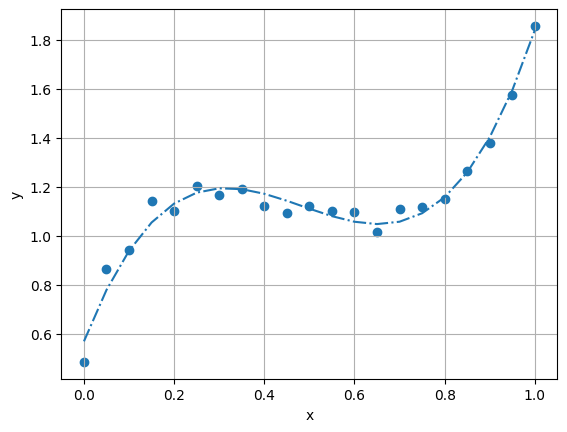

In [248]:
data = pd.read_csv('assign3fit.txt', delimiter= '\t',  index_col=False)
A=data["# x"].tolist()
B=data["  y"].tolist()
X,Y=PolFit(A,B,4)
X1,Y1=PolFitfun(A,B,4,phi)
#print(X)
plt.plot(X,Y,"-.")
plt.scatter(A,B)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

# Statistics

In [249]:
def mean(X):
    return(sum(X)/len(X))
def stddiv(X):
    L=[(x-mean(X))**2 for x in X]
    return((sum(L)/(len(X)-1))**0.5)

## Normal Distribution

In [250]:
def normal_distribution(x, mean, std_dev):
    return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std_dev ** 2))

In [251]:
def normaldist(x,k,total,sigma=1):
    num=np.linspace(0,x-1,x)
    #print(num)
    std_dev=1
    normal_values = normal_distribution(num, k, std_dev)
    normalized_values = normal_values / np.sum(normal_values) * total
    return np.round(normalized_values)

## F test

In [252]:
def F_test(A,B):
    s1=stddiv(A)
    s2=stddiv(B)
    return(max(s1,s2)/min(s1,s2))

## T test

In [253]:
def T_test(A,B):
    m1=mean(A)
    m2=mean(B)
    s1=stddiv(A)
    s2=stddiv(B)
    t=abs(m1-m2)/(s1**2+s2**2)**0.5
    return(t)

In [254]:
def dof_t_test(A,B):
    s1=stddiv(A)
    s2=stddiv(B)
    N1=len(A)
    N2=len(B)
    neu=((s1**2/N1+s2**2/N2)**2)/(s1**4/((N1-1)*N1**2)+s2**4/((N2-1)*N2**2))
    return(Round(neu))

# Pseudo random number generator

In [255]:
def random_genQ1(a,m,x0=1):
    R=np.ones(m)
    R[0]=x0
    for i in range(1,m):
        R[i]=a*R[i-1]%m
    return(R/m)

def random_gen(a,m,i,f,x0=1):
    Ran=random_genQ1(a,m,x0)
    return(i+(f-i)*Ran)

## Random number generator test

In [256]:
def Correlation_test(n,X):
    N=len(X)
    eps=0
    for i in range(N):
        if i<N-n:
            eps+=(X[i]*X[i+n])
        else:
            eps+=X[i]*X[i-N+n]
    eps=eps/N
    eps-=(np.sum(X)/N)**2
    return(eps)

In [257]:
def Moments_test(k,X):
    N=len(X)
    mu=np.absolute(np.sum(X**k)/N-1/(k+1))
    return(mu)

## MC with custom random number generator

In [258]:
def INT_MONT2(func,a,b,N=1000):
    f=sum(func(random_gen(439,N,a,b)[:N]))
    F=(b-a)*f/N
    return(F)

def INT_MONT_PLOT(func,a,b,i,f,step):
    X=np.arange(i,f+1,step)
    Y=[]
    for i in X:
        Y.append(INT_MONT2(func,a,b,i))
    return(X,Y)

## Inversion method

Let q(y) be the distribution function and the range be $a<y<b$. First get $\int_a^b q(y)dy$. Now, 

$x= \int^y_a (q(y)/\int_a^b q(y)dy)dy$. Invert the function and write y=f(x). 

## Accept-reject method
base_func is the inverse of the base distribution of random number generated by inversion method.
f and g are the intended distribution and sample distribution respectively.

c is the maximum of f(x)/g(x). 

In [259]:
def accept_reject_ran_gen(f,g,base_func,c,N):
    X=base_func(random_gen(439,100*N,0,1))
    U=random_gen(469,100*N,0,1)
    Z=[]
    i=0
    while len(Z)<N:
        if U[i]<=f(X[i])/(c*g(X[i])):
            Z.append(X[i])
        i+=1
    return(np.array(Z))


## Monte-Carlo Integration with custom distributions

integrand is the function we want to integrate.
funcsample is the sample distribution function.
Invfunc is the inverse of the sample distribution function.

In [260]:
def INT_MONT_var(integrand,funcsample,Invfunc,N=1000):
    t=Invfunc(random_gen(469,N,0,1))
    plt.hist(t,20)
    f=sum(integrand(t)/funcsample(t))
    f2=sum((integrand(t)/funcsample(t))**2)
    F=f/N
    variance=f2/N-(f/N)**2
    return(F,variance)